In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
sns.set_style("whitegrid")
from matplotlib.ticker import NullFormatter
from matplotlib.ticker import MultipleLocator

# customized settings
params = {  # 'backend': 'ps',
    'font.family': 'serif',
    'font.serif': 'Latin Modern Roman',
    'font.size': 18,
    'axes.labelsize': 'medium',
    'axes.titlesize': 'medium',
    'legend.fontsize': 'medium',
    'xtick.labelsize': 'small',
    'ytick.labelsize': 'small',
    'savefig.dpi': 150,
    'text.usetex': True}
# tell matplotlib about your params
rcParams.update(params)

# set nice figure sizes
fig_width_pt = 1000    # Get this from LaTeX using \showthe\columnwidth
golden_mean = (np.sqrt(5.) - 1.) / 2.  # Aesthetic ratio
ratio = golden_mean
inches_per_pt = 1. / 72.27  # Convert pt to inches
fig_width = fig_width_pt * inches_per_pt  # width in inches
fig_height = fig_width*ratio  # height in inches
fig_size = [fig_width, fig_width]
rcParams.update({'figure.figsize': fig_size})

23.07529296875


findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


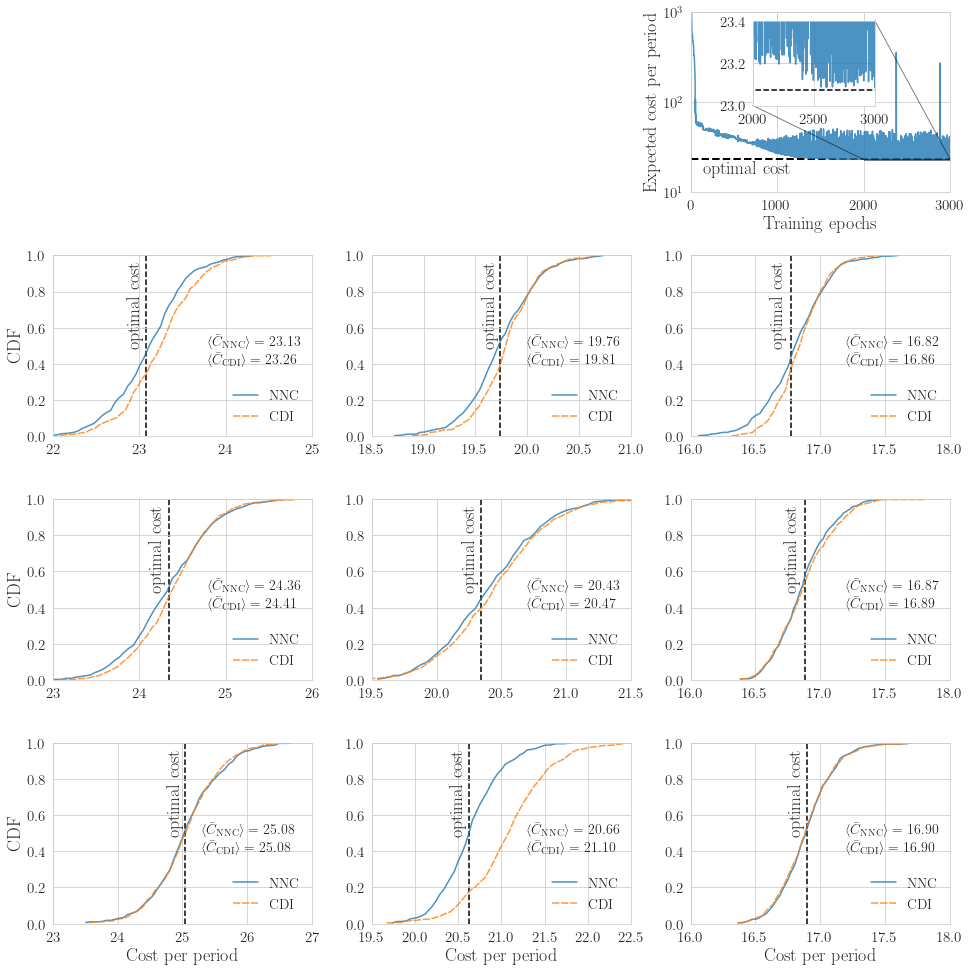

In [2]:
def cdf(data):
    H,X1 = np.histogram( data, bins=50, density=True )
    dx = X1[1] - X1[0]
    F1 = np.cumsum(H)*dx
    X1 = 0.5*(X1[:-1]+X1[1:])
    return X1,F1

fig = plt.figure()

data = np.loadtxt("cost_direct_learning.dat")

print(min(data))

gs = fig.add_gridspec(4,3)

ml = MultipleLocator(100)
#ax10 = fig.add_subplot(gs[0, 0])
#ax01 = fig.add_subplot(gs[0, 1])
ax02 = fig.add_subplot(gs[0, 2])
ax02.plot(data,alpha=0.8)
ax02.hlines(23.07,0,3000,linewidths=2,colors="k",linestyles="--")
ax02.yaxis.set_minor_formatter(NullFormatter())
ax02.set_xlim([0,3000])
ax02.set_ylim([10,1000])
ax02.set_yscale('log')
ax02.set_xlabel(r'Training epochs')
ax02.set_ylabel(r'Expected cost per period')
    
# inset axes....
axins = ax02.inset_axes([0.24, 0.48, 0.47, 0.47])
axins.xaxis.set_minor_locator(ml)
axins.plot(data,alpha=0.8)
# sub region of the original image
x1, x2, y1, y2 = -1.5, -0.9, -2.5, -1.9
axins.set_xlim(2000, 3000)
axins.set_xticks([2000, 2500, 3000])
axins.hlines(23.074,0,3000,linewidths=1.5,colors="k",linestyles="--")
axins.set_ylim(23,23.4)
#axins.text(2040, 23.01, r"optimal cost", fontsize=18)
ax02.indicate_inset_zoom(axins, edgecolor="black")
ax02.text(140, 16, r"optimal cost", fontsize=18)
ax02.xaxis.set_minor_locator(ml)

samples1 = np.loadtxt("nnc_cdi_samples_lr=2_ce=20.dat")

ax10 = fig.add_subplot(gs[1, 0])
ax10.vlines(23.073,0,1,ls="--",linewidths=1.5,color="k",zorder=0)
ax10.text(22.86, 0.5, r"optimal cost", fontsize=18, rotation=90)
x,y = cdf(samples1[:,0])
ax10.plot(x,y,alpha=0.8,label=r"NNC",zorder=1)
x,y = cdf(samples1[:,1])
ax10.plot(x,y,alpha=0.8,label=r"CDI",zorder=1,linestyle=(0, (5, 1)))
ax10.text(0.6*(25-22)+22,0.5,r"$\langle \bar{C}_{\mathrm{NNC}}\rangle=%1.2f$"%np.mean(samples1[:,0]),fontsize=14)
ax10.text(0.6*(25-22)+22,0.4,r"$\langle \bar{C}_{\mathrm{CDI}}\rangle=%1.2f$"%np.mean(samples1[:,1]),fontsize=14)
ax10.set_xlim(22,25)
ax10.set_ylim(0,1)
ax10.set_ylabel(r"CDF")
ax10.legend(loc=4,ncol=1,fontsize=14,handlelength=1.8,frameon=False)
ax10.xaxis.set_minor_locator(MultipleLocator(0.1))

samples2 = np.loadtxt("nnc_cdi_samples_lr=2_ce=10.dat")

ax11 = fig.add_subplot(gs[1, 1])
ax11.vlines(19.735,0,1,ls="--",linewidths=1.5,color="k",zorder=0)
ax11.text(19.56, 0.5, r"optimal cost", fontsize=18, rotation=90)
x,y = cdf(samples2[:,0])
ax11.plot(x,y,alpha=0.8,label=r"NNC",zorder=1)
x,y = cdf(samples2[:,1])
ax11.plot(x,y,alpha=0.8,label=r"CDI",zorder=1,linestyle=(0, (5, 1)))
ax11.text(0.6*(21-18.5)+18.5,0.5,r"$\langle \bar{C}_{\mathrm{NNC}}\rangle=%1.2f$"%np.mean(samples2[:,0]),fontsize=14)
ax11.text(0.6*(21-18.5)+18.5,0.4,r"$\langle \bar{C}_{\mathrm{CDI}}\rangle=%1.2f$"%np.mean(samples2[:,1]),fontsize=14)
ax11.set_xlim(18.5,21)
ax11.set_ylim(0,1)
ax11.legend(loc=4,ncol=1,fontsize=14,handlelength=1.8,frameon=False)
ax11.xaxis.set_minor_locator(MultipleLocator(0.1))

samples3 = np.loadtxt("nnc_cdi_samples_lr=2_ce=5.dat")

ax12 = fig.add_subplot(gs[1, 2])
ax12.vlines(16.772,0,1,ls="--",linewidths=1.5,color="k",zorder=0)
ax12.text(16.61, 0.5, r"optimal cost", fontsize=18, rotation=90)
x,y = cdf(samples3[:,0])
ax12.plot(x,y,alpha=0.8,label=r"NNC",zorder=1)
x,y = cdf(samples3[:,1])
ax12.plot(x,y,alpha=0.8,label=r"CDI",zorder=1,linestyle=(0, (5, 1)))
ax12.text(0.6*(18-16)+16,0.5,r"$\langle \bar{C}_{\mathrm{NNC}}\rangle=%1.2f$"%np.mean(samples3[:,0]),fontsize=14)
ax12.text(0.6*(18-16)+16,0.4,r"$\langle \bar{C}_{\mathrm{CDI}}\rangle=%1.2f$"%np.mean(samples3[:,1]),fontsize=14)
ax12.set_xlim(16,18)
ax12.set_xticks([16,16.5,17,17.5,18])
ax12.set_ylim(0,1)
ax12.legend(loc=4,ncol=1,fontsize=14,handlelength=1.8,frameon=False)
ax12.xaxis.set_minor_locator(MultipleLocator(0.1))

samples4 = np.loadtxt("nnc_cdi_samples_lr=3_ce=20.dat")

ax20 = fig.add_subplot(gs[2, 0])
ax20.vlines(24.339,0,1,ls="--",linewidths=1.5,color="k",zorder=0)
ax20.text(24.11, 0.5, r"optimal cost", fontsize=18, rotation=90)
x,y = cdf(samples4[:,0])
ax20.plot(x,y,alpha=0.8,label=r"NNC",zorder=1)
x,y = cdf(samples4[:,1])
ax20.plot(x,y,alpha=0.8,label=r"CDI",zorder=1,linestyle=(0, (5, 1)))
ax20.text(0.6*(26-23)+23,0.5,r"$\langle \bar{C}_{\mathrm{NNC}}\rangle=%1.2f$"%np.mean(samples4[:,0]),fontsize=14)
ax20.text(0.6*(26-23)+23,0.4,r"$\langle \bar{C}_{\mathrm{CDI}}\rangle=%1.2f$"%np.mean(samples4[:,1]),fontsize=14)
ax20.set_xlim(23,26)
ax20.set_ylim(0,1)
ax20.legend(loc=4,ncol=1,fontsize=14,handlelength=1.8,frameon=False)
ax20.set_ylabel(r"CDF")
ax20.xaxis.set_minor_locator(MultipleLocator(0.1))

samples5 = np.loadtxt("nnc_cdi_samples_lr=3_ce=10.dat")

ax21 = fig.add_subplot(gs[2, 1])
ax21.vlines(20.344,0,1,ls="--",linewidths=1.5,color="k",zorder=0)
ax21.text(20.2, 0.5, r"optimal cost", fontsize=18, rotation=90)
x,y = cdf(samples5[:,0])
ax21.plot(x,y,alpha=0.8,label=r"NNC",zorder=1)
x,y = cdf(samples5[:,1])
ax21.plot(x,y,alpha=0.8,label=r"CDI",zorder=1,linestyle=(0, (5, 1)))
ax21.text(0.6*(21.5-19.5)+19.5,0.5,r"$\langle \bar{C}_{\mathrm{NNC}}\rangle=%1.2f$"%np.mean(samples5[:,0]),fontsize=14)
ax21.text(0.6*(21.5-19.5)+19.5,0.4,r"$\langle \bar{C}_{\mathrm{CDI}}\rangle=%1.2f$"%np.mean(samples5[:,1]),fontsize=14)
ax21.set_xlim(19.5,21.5)
ax21.set_xticks([19.5,20,20.5,21,21.5])
ax21.set_ylim(0,1)
ax21.legend(loc=4,ncol=1,fontsize=14,handlelength=1.8,frameon=False)
ax21.xaxis.set_minor_locator(MultipleLocator(0.1))

samples6 = np.loadtxt("nnc_cdi_samples_lr=3_ce=5.dat")

ax22 = fig.add_subplot(gs[2, 2])
ax22.vlines(16.88,0,1,ls="--",linewidths=1.5,color="k",zorder=0)
ax22.text(16.72, 0.5, r"optimal cost", fontsize=18, rotation=90)
x,y = cdf(samples6[:,0])
ax22.plot(x,y,alpha=0.8,label=r"NNC",zorder=1)
x,y = cdf(samples6[:,1])
ax22.plot(x,y,alpha=0.8,label=r"CDI",zorder=1,linestyle=(0, (5, 1)))
ax22.text(0.6*(18-16)+16,0.5,r"$\langle \bar{C}_{\mathrm{NNC}}\rangle=%1.2f$"%np.mean(samples6[:,0]),fontsize=14)
ax22.text(0.6*(18-16)+16,0.4,r"$\langle \bar{C}_{\mathrm{CDI}}\rangle=%1.2f$"%np.mean(samples6[:,1]),fontsize=14)
ax22.set_xlim(16,18)
ax22.set_xticks([16,16.5,17,17.5,18])
ax22.set_ylim(0,1)
ax22.legend(loc=4,ncol=1,fontsize=14,handlelength=1.8,frameon=False)
ax22.xaxis.set_minor_locator(MultipleLocator(0.1))

samples7 = np.loadtxt("nnc_cdi_samples_lr=4_ce=20.dat")

ax30 = fig.add_subplot(gs[3, 0])
ax30.vlines(25.044,0,1,ls="--",linewidths=1.5,color="k",zorder=0)
ax30.text(24.76, 0.5, r"optimal cost", fontsize=18, rotation=90)
x,y = cdf(samples7[:,0])
ax30.plot(x,y,alpha=0.8,label=r"NNC",zorder=1)
x,y = cdf(samples7[:,1])
ax30.plot(x,y,alpha=0.8,label=r"CDI",zorder=1,linestyle=(0, (5, 1)))
ax30.text(0.6*(26.5-23.5)+23.5,0.5,r"$\langle \bar{C}_{\mathrm{NNC}}\rangle=%1.2f$"%np.mean(samples7[:,0]),fontsize=14)
ax30.text(0.6*(26.5-23.5)+23.5,0.4,r"$\langle \bar{C}_{\mathrm{CDI}}\rangle=%1.2f$"%np.mean(samples7[:,1]),fontsize=14)
ax30.set_xlim(23,27)
ax30.set_ylim(0,1)
ax30.legend(loc=4,ncol=1,fontsize=14,handlelength=1.8,frameon=False)
ax30.set_xlabel(r"Cost per period")
ax30.set_ylabel(r"CDF")

samples8 = np.loadtxt("nnc_cdi_samples_lr=4_ce=10_2.dat")

ax31 = fig.add_subplot(gs[3, 1])
ax31.vlines(20.62,0,1,ls="--",linewidths=1.5,color="k",zorder=0)
ax31.text(20.41, 0.5, r"optimal cost", fontsize=18, rotation=90)
x,y = cdf(samples8[:,0])
ax31.plot(x,y,alpha=0.8,label=r"NNC",zorder=1)
x,y = cdf(samples8[:,1])
ax31.plot(x,y,alpha=0.8,label=r"CDI",zorder=1,linestyle=(0, (5, 1)))
ax31.text(0.6*(22.5-19.5)+19.5,0.5,r"$\langle \bar{C}_{\mathrm{NNC}}\rangle=%1.2f$"%np.mean(samples8[:,0]),fontsize=14)
ax31.text(0.6*(22.5-19.5)+19.5,0.4,r"$\langle \bar{C}_{\mathrm{CDI}}\rangle=%1.2f$"%np.mean(samples8[:,1]),fontsize=14)
ax31.set_xlim(19.5,22.5)
ax31.set_xticks([19.5,20,20.5,21,21.5,22,22.5])
ax31.set_ylim(0,1)
ax31.legend(loc=4,ncol=1,fontsize=14,handlelength=1.8,frameon=False)
ax31.set_xlabel(r"Cost per period")

samples9 = np.loadtxt("nnc_cdi_samples_lr=4_ce=5.dat")

ax32 = fig.add_subplot(gs[3, 2])
ax32.vlines(16.90,0,1,ls="--",linewidths=1.5,color="k",zorder=0)
ax32.text(16.75, 0.5, r"optimal cost", fontsize=18, rotation=90)
x,y = cdf(samples9[:,0])
ax32.plot(x,y,alpha=0.8,label=r"NNC",zorder=1)
x,y = cdf(samples9[:,1])
ax32.plot(x,y,alpha=0.8,label=r"CDI",zorder=1,linestyle=(0, (5, 1)))
ax32.text(0.6*(18-16)+16,0.5,r"$\langle \bar{C}_{\mathrm{NNC}}\rangle=%1.2f$"%np.mean(samples9[:,0]),fontsize=14)
ax32.text(0.6*(18-16)+16,0.4,r"$\langle \bar{C}_{\mathrm{CDI}}\rangle=%1.2f$"%np.mean(samples9[:,1]),fontsize=14)
ax32.set_xlim(16,18)
ax32.set_xticks([16,16.5,17,17.5,18])
ax32.set_ylim(0,1)
ax32.legend(loc=4,ncol=1,fontsize=14,handlelength=1.8,frameon=False)
ax32.set_xlabel(r"Cost per period")

plt.tight_layout()
plt.margins(0,0)
plt.subplots_adjust(wspace=0.23, hspace=0.35)
plt.savefig("direct_learning.svg", dpi = 300, bbox_inches = 'tight', pad_inches = 0.05)
plt.show()

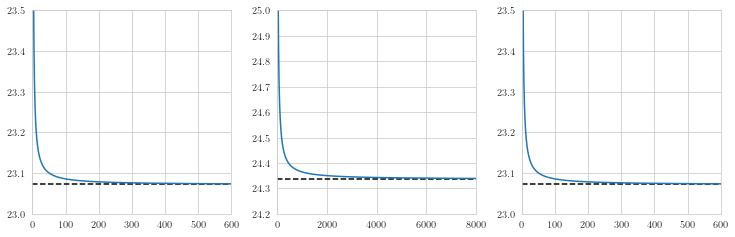

In [3]:
import pandas as pd

# customized settings
params = {  # 'backend': 'ps',
    'font.family': 'serif',
    'font.serif': 'Latin Modern Roman',
    'font.size': 12,
    'axes.labelsize': 'medium',
    'axes.titlesize': 'medium',
    'legend.fontsize': 'medium',
    'xtick.labelsize': 'small',
    'ytick.labelsize': 'small',
    'savefig.dpi': 150,
    'text.usetex': True}
# tell matplotlib about your params
rcParams.update(params)

# set nice figure sizes
fig_width_pt = 3*250    # Get this from LaTeX using \showthe\columnwidth
golden_mean = (np.sqrt(5.) - 1.) / 2.  # Aesthetic ratio
ratio = golden_mean
inches_per_pt = 1. / 72.27  # Convert pt to inches
fig_width = fig_width_pt * inches_per_pt  # width in inches
fig_height = fig_width*ratio  # height in inches
fig_size = [fig_width, 1/3*fig_width]
rcParams.update({'figure.figsize': fig_size})

dp_lr2_ce20 = pd.read_csv("iteration_output_lr=2_ce=20.csv")
dp_lr3_ce20 = pd.read_csv("iteration_output_lr=3_ce=20.csv")
dp_lr2_ce20 = pd.read_csv("iteration_output_lr=2_ce=20.csv")

fig, ax = plt.subplots(ncols=3)

ax[0].plot(dp_lr2_ce20["run time [seconds]"].to_numpy(), dp_lr2_ce20["cost"].to_numpy())
ax[0].hlines(dp_lr2_ce20["cost"].to_numpy()[-1],0,600,linestyles="--",linewidths=1.5,color="k")
ax[0].set_xlim(0,600)
ax[0].set_xlim(0,600)
ax[0].set_ylim(23,23.5)

ax[1].plot(dp_lr3_ce20["run time [seconds]"].to_numpy(), dp_lr3_ce20["cost"].to_numpy())
ax[1].hlines(dp_lr3_ce20["cost"].to_numpy()[-1],0,8000,linestyles="--",linewidths=1.5,color="k")
ax[1].set_xlim(0,8000)
ax[1].set_ylim(24.2,25)

ax[2].plot(dp_lr2_ce20["run time [seconds]"].to_numpy(), dp_lr2_ce20["cost"].to_numpy())
ax[2].hlines(dp_lr2_ce20["cost"].to_numpy()[-1],0,600,linestyles="--",linewidths=1.5,color="k")
ax[2].set_xlim(0,600)
ax[2].set_ylim(23,23.5)

plt.tight_layout()
plt.margins(0,0)
plt.subplots_adjust(wspace=0.23, hspace=0.23)
plt.savefig("direct_learning_vs_dp.png", dpi = 300, bbox_inches = 'tight', pad_inches = 0.05)
plt.show()

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


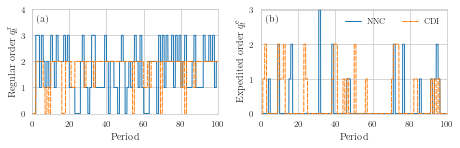

In [4]:
# customized settings
params = {  # 'backend': 'ps',
    'font.family': 'serif',
    'font.serif': 'Latin Modern Roman',
    'font.size': 10,
    'axes.labelsize': 'medium',
    'axes.titlesize': 'medium',
    'legend.fontsize': 'medium',
    'xtick.labelsize': 'small',
    'ytick.labelsize': 'small',
    'savefig.dpi': 150,
    'text.usetex': True}
# tell matplotlib about your params
rcParams.update(params)

# set nice figure sizes
fig_width_pt = 469.75499  # Get this from LaTeX using \showthe\columnwidth
golden_mean = (np.sqrt(5.) - 1.) / 2.  # Aesthetic ratio
ratio = golden_mean
inches_per_pt = 1. / 72.27  # Convert pt to inches
fig_width = fig_width_pt * inches_per_pt  # width in inches
fig_height = fig_width*ratio  # height in inches
fig_size = [fig_width, 1/3*fig_width]
rcParams.update({'figure.figsize': fig_size})

data1 = np.loadtxt("NNC_CDI_order_comparison_qr_h=5_b=495_cr=0_ce=20_lr=2_le=0.csv",delimiter=",")
data2 = np.loadtxt("NNC_CDI_order_comparison_qe_h=5_b=495_cr=0_ce=20_lr=2_le=0.csv",delimiter=",")

fig, ax = plt.subplots(ncols=2)

orders_1 = data1[:,0]
orders_1 = np.repeat(orders_1,200)
orders_2 = data1[:,1]
orders_2 = np.repeat(orders_2,200)
t_arr = np.linspace(0,1002,len(orders_1))

ax[0].text(0.02*100,0.88*4,r"(a)")
ax[0].plot(t_arr,orders_1,linewidth=1.0)
ax[0].plot(t_arr,orders_2,linewidth=1.0,linestyle=(0, (5, 1)))
ax[0].set_xlim(0,100)
ax[0].set_ylim(0,4)
ax[0].set_xlabel(r"Period")
ax[0].set_ylabel(r"Regular order $q^{\mathrm{r}}_t$")

orders_1 = data2[:,0]
orders_1 = np.repeat(orders_1,200)
orders_2 = data2[:,1]
orders_2 = np.repeat(orders_2,200)
t_arr = np.linspace(0,1002,len(orders_1))

ax[1].text(0.02*100,0.88*3,r"(b)")
ax[1].plot(t_arr,orders_1,linewidth=1.0,label=r"NNC")
ax[1].plot(t_arr,orders_2,linewidth=1.0,label=r"CDI",linestyle=(0, (5, 1)))
ax[1].set_xlim(0,100)
ax[1].set_ylim(0,3.01)
ax[1].set_yticks([0,1,2,3])
ax[1].set_xlabel(r"Period")
ax[1].set_ylabel(r"Expedited order $q^{\mathrm{e}}_t$")

ax[1].legend(loc=1,ncol=2,frameon=False,handlelength=2,fontsize=8)

plt.tight_layout()
plt.margins(0,0)
plt.subplots_adjust(wspace=0.23, hspace=0.23)
plt.savefig("nnc_cdi_order_comparison.svg", dpi = 300, bbox_inches = 'tight', pad_inches = 0.05)
plt.show()

In [5]:
np.mean(data1[:,0]), np.std(data1[:,0])

(1.8033932135728543, 0.9820080363758937)

In [6]:
np.mean(data1[:,1]), np.std(data1[:,1])

(1.721556886227545, 0.6071056059894665)